In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
p0_V, p1_V = 2.0402672878862194, 0.38024521824423774
p0_TA , p1_TA , p2_TA = 382.9652981651816 , 877.9109917227037 , 479.33716504028456 

def fonc_V(x): return p0_V + p1_V*x
def fonc_TA(x): return p0_TA + p1_TA*x + p2_TA*x**2 

X = np.array ([0 , 0.1 , 0.3 , 0.4 , 0.55 , 0.75 , 0.9 , 1.05 , 1.2 , 1.5 , 1.75 , 2.0 , 2.2 ]) 
V = np.array ([]) 
TA = np.array ([])

0 0.5106370636278267
0 0.5106370636278267
1 -1.2811879890697888
1 [2.6808377]
2 -11.195164004592744
2 [4.73150412]
3 19.853935327835497
3 19.853935327835497
4 39.048094240302206
4 39.048094240302206
5 139.25250955040553
5 139.25250955040553
6 221.05728315587874
6 221.05728315587874
7 281.5017753338281
7 281.5017753338281
8 426.4867702096244
8 426.4867702096244
9 737.5753646340111
9 737.5753646340111
10 1033.0076654866448
10 1033.0076654866448
11 1392.0997168015688
11 1392.0997168015688
12 1583.9757285271444
12 1583.9757285271444
Fit V(x) : a = 2.0415, b = 0.3783
Fit TA(x) : a = 10.85, b = -166.92, c = 432.18


/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_19861/1788161453.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  TA[i] = ta


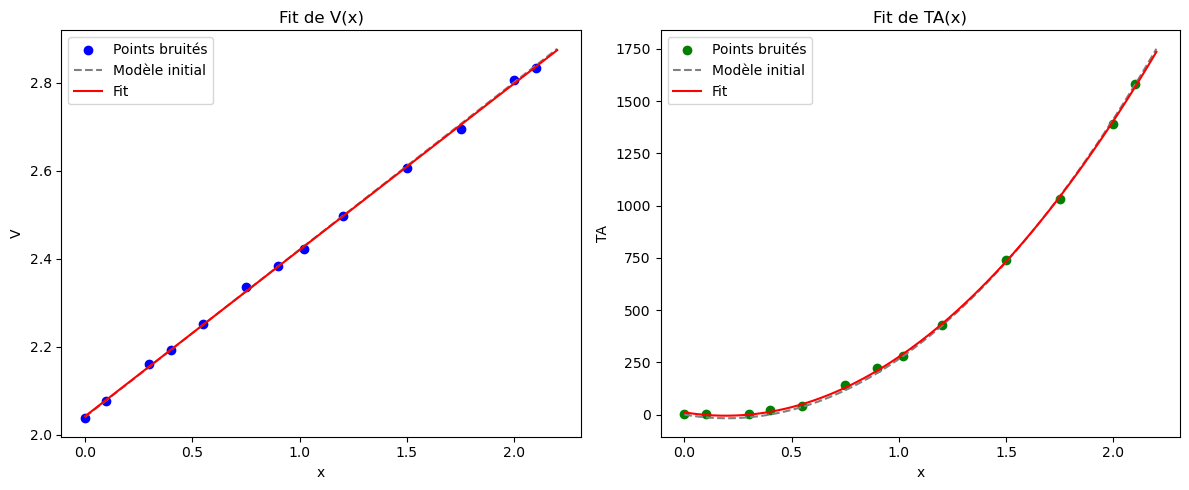

In [5]:
# Paramètres initiaux
p0_V, p1_V = 2.0402672878862194, 0.38024521824423774
p0_TA, p1_TA, p2_TA = 382.9652981651816, 879.109917227037, +479.33716504028456
p0_TA, p1_TA, p2_TA = 0 , -175.8 , 441.5   
# Fonctions modèles
def fonc_V(x): return p0_V + p1_V * x
def fonc_TA(x): return p0_TA + p1_TA * x + p2_TA * x**2

# Bruit simulé (ajustable)
noise_level_V = 0.005  # écart-type du bruit pour V
noise_level_TA = 10.0  # écart-type du bruit pour TA

# Données X
X = np.array([0, 0.1, 0.3, 0.4, 0.55, 0.75, 0.9, 1.02, 1.2, 1.5, 1.75, 2.0, 2.1])

# Génération des données bruitées
V = fonc_V(X) + np.random.normal(0, noise_level_V, size=X.shape)
TA = fonc_TA(X) + np.random.normal(0, noise_level_TA, size=X.shape)
for i , ta in enumerate(TA):
    print(i, ta)
    if i == 0 : 
        while np.any(ta < 0): 
            ta = fonc_TA(X[i]) + np.random.normal(0, noise_level_TA, size=1)
    else : 
        while ta < TA[i-1] : 
            ta = fonc_TA(X[i]) + np.random.normal(0, noise_level_TA, size=1)
    print(i, ta)
    TA[i] = ta
while np.any(TA < 0):
    TA = fonc_TA(X) + np.random.normal(0, noise_level_TA, size=X.shape)

# Fit des données bruitées
def model_V(x, a, b): return a + b * x
def model_TA(x, a, b, c): return a + b * x + c * x**2

popt_V, _ = curve_fit(model_V, X, V)
popt_TA, _ = curve_fit(model_TA, X, TA)

# Affichage des résultats
print("Fit V(x) : a = {:.4f}, b = {:.4f}".format(*popt_V))
print("Fit TA(x) : a = {:.2f}, b = {:.2f}, c = {:.2f}".format(*popt_TA))

# Tracés
x_plot = np.linspace(0, 2.2, 200)

plt.figure(figsize=(12, 5))

# Graphique pour V
plt.subplot(1, 2, 1)
plt.scatter(X, V, label="Points bruités", color="blue")
plt.plot(x_plot, fonc_V(x_plot), '--', label="Modèle initial", color="gray")
plt.plot(x_plot, model_V(x_plot, *popt_V), label="Fit", color="red")
plt.title("Fit de V(x)")
plt.xlabel("x")
plt.ylabel("V")
plt.legend()

# Graphique pour TA
plt.subplot(1, 2, 2)
plt.scatter(X, TA, label="Points bruités", color="green")
plt.plot(x_plot, fonc_TA(x_plot), '--', label="Modèle initial", color="gray")
plt.plot(x_plot, model_TA(x_plot, *popt_TA), label="Fit", color="red")
plt.title("Fit de TA(x)")
plt.xlabel("x")
plt.ylabel("TA")
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Paramètres initiaux pour comparaison
true_params_V = (p0_V, p1_V)
true_params_TA = (p0_TA, p1_TA, p2_TA)

# Affichage comparatif
print("=== Résultats du fit de V(x) ===")
print("Paramètres initiaux : a = {:.4f}, b = {:.4f}".format(*true_params_V))
print("Paramètres ajustés  : a = {:.4f}, b = {:.4f}".format(*popt_V))
print()

print("=== Résultats du fit de TA(x) ===")
print("Paramètres initiaux : a = {:.2f}, b = {:.2f}, c = {:.2f}".format(*true_params_TA))
print("Paramètres ajustés  : a = {:.2f}, b = {:.2f}, c = {:.2f}".format(*popt_TA))

# Écarts relatifs (%)
def relative_error(true, fitted):
    return 100 * abs((fitted - true) / true)

print("\n=== Écart relatif sur V(x) ===")
for i, name in enumerate(['a', 'b']):
    err = relative_error(true_params_V[i], popt_V[i])
    print(f"{name} : {err:.2f} %")

print("\n=== Écart relatif sur TA(x) ===")
for i, name in enumerate(['a', 'b', 'c']):
    err = relative_error(true_params_TA[i], popt_TA[i])
    print(f"{name} : {err:.2f} %")

=== Résultats du fit de V(x) ===
Paramètres initiaux : a = 2.0403, b = 0.3802
Paramètres ajustés  : a = 2.0415, b = 0.3783

=== Résultats du fit de TA(x) ===
Paramètres initiaux : a = 0.00, b = -175.80, c = 441.50
Paramètres ajustés  : a = 10.85, b = -166.92, c = 432.18

=== Écart relatif sur V(x) ===
a : 0.06 %
b : 0.51 %

=== Écart relatif sur TA(x) ===
a : inf %
b : 5.05 %
c : 2.11 %


/var/folders/sc/1jlhfymx3sg5vz8q1fx87pvr0000gn/T/ipykernel_19861/3118672568.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return 100 * abs((fitted - true) / true)


Polynôme d'interpolation de Lagrange (TA) :
       2
441.5 x - 175.8 x


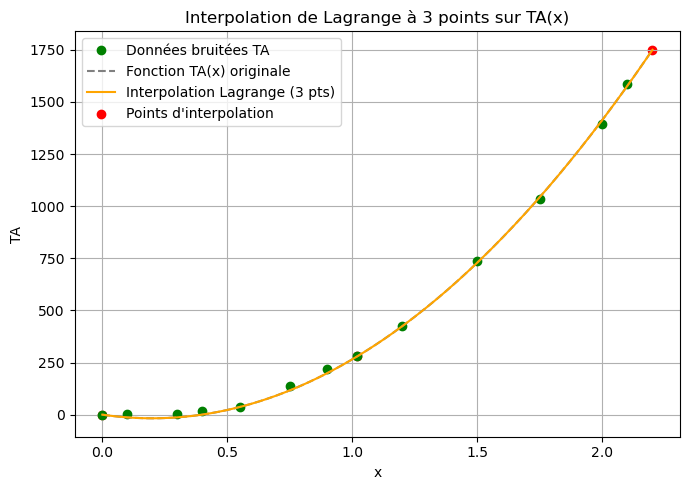

In [9]:
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

# Choix de 3 points (indices dans X)
#indices = [2, 5, 8]
#x_sample = X[indices]
#ta_sample = TA[indices]

x_sample = [0 , 1.02 , 2.2]
ta_sample = [0, 280 , 1750]

# Interpolation de Lagrange sur TA
poly_lagrange_TA = lagrange(x_sample, ta_sample)

print("Polynôme d'interpolation de Lagrange (TA) :")
print(np.poly1d(poly_lagrange_TA))

# Tracé
x_plot = np.linspace(0, 2.2, 200)
plt.figure(figsize=(7, 5))
plt.plot(X, TA, 'o', label="Données bruitées TA", color="green")
plt.plot(x_plot, fonc_TA(x_plot), '--', label="Fonction TA(x) originale", color="gray")
plt.plot(x_plot, poly_lagrange_TA(x_plot), '-', label="Interpolation Lagrange (3 pts)", color="orange")
plt.scatter(x_sample, ta_sample, color='red', label="Points d'interpolation")
plt.title("Interpolation de Lagrange à 3 points sur TA(x)")
plt.xlabel("x")
plt.ylabel("TA")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

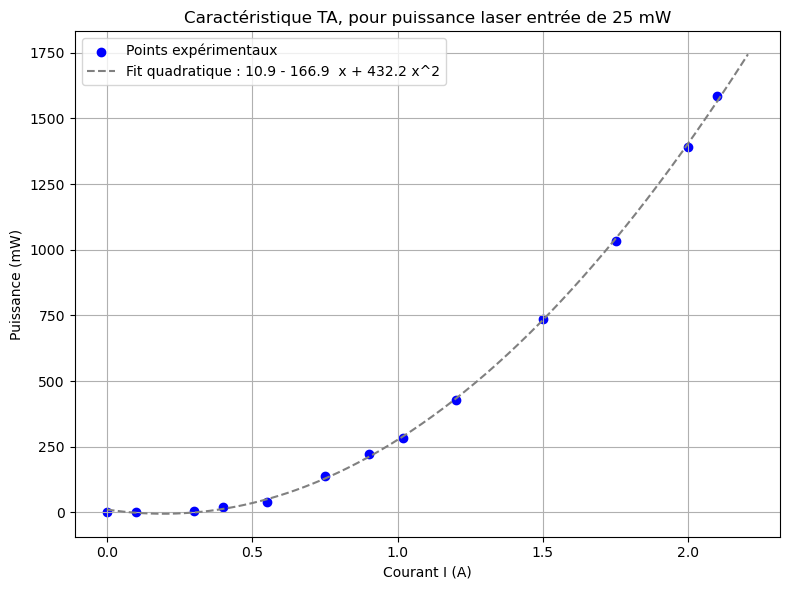

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# Fit quadratique
def model_TA(x, a, b, c): 
    return a + b*x + c*x**2

popt_TA, pcov_TA = curve_fit(model_TA, X, TA)

# Tracé
x_plot = np.linspace(0, max(X)*1.05, 300)
plt.figure(figsize=(8, 6))
plt.scatter(X, TA, color='blue', label="Points expérimentaux")
plt.plot(
    x_plot, model_TA(x_plot, *popt_TA), '--', color='grey',
    label=(
        r"Fit quadratique : "
        rf"{popt_TA[0]:.1f} "
        r"- "
        rf"{np.abs(popt_TA[1]):.1f}  x "
        r"+ "
        rf"{popt_TA[2]:.1f} x^2"
    )
)
plt.title("Caractéristique TA, pour puissance laser entrée de 25 mW")
plt.xlabel("Courant I (A)")
plt.ylabel("Puissance (mW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig("Puissance_TA.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
print(X)
print(np.round(TA, 3))

[0.   0.1  0.3  0.4  0.55 0.75 0.9  1.02 1.2  1.5  1.75 2.   2.1 ]
[5.110000e-01 2.681000e+00 4.732000e+00 1.985400e+01 3.904800e+01
 1.392530e+02 2.210570e+02 2.815020e+02 4.264870e+02 7.375750e+02
 1.033008e+03 1.392100e+03 1.583976e+03]


In [30]:
np.set_printoptions(precision=2, suppress=False)  # precision=3 chiffres après la virgule
print(X)
print(list(np.round(TA, 3)))

[0.   0.1  0.3  0.4  0.55 0.75 0.9  1.02 1.2  1.5  1.75 2.   2.1 ]
[5.11e-01 2.68e+00 4.73e+00 1.99e+01 3.90e+01 1.39e+02 2.21e+02 2.82e+02
 4.26e+02 7.38e+02 1.03e+03 1.39e+03 1.58e+03]


In [28]:
print(X)
print(np.array2string(np.round(TA, 3), formatter={'float_kind': lambda x: "%.2e" % x}))


[0.   0.1  0.3  0.4  0.55 0.75 0.9  1.02 1.2  1.5  1.75 2.   2.1 ]
['[', '5', '.', '1', '1', 'e', '-', '0', '1', ' ', '2', '.', '6', '8', 'e', '+', '0', '0', ' ', '4', '.', '7', '3', 'e', '+', '0', '0', ' ', '1', '.', '9', '9', 'e', '+', '0', '1', ' ', '3', '.', '9', '0', 'e', '+', '0', '1', ' ', '1', '.', '3', '9', 'e', '+', '0', '2', ' ', '2', '.', '2', '1', 'e', '+', '0', '2', ' ', '2', '.', '8', '2', 'e', '+', '0', '2', '\n', ' ', '4', '.', '2', '6', 'e', '+', '0', '2', ' ', '7', '.', '3', '8', 'e', '+', '0', '2', ' ', '1', '.', '0', '3', 'e', '+', '0', '3', ' ', '1', '.', '3', '9', 'e', '+', '0', '3', ' ', '1', '.', '5', '8', 'e', '+', '0', '3', ']']
